# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [1]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


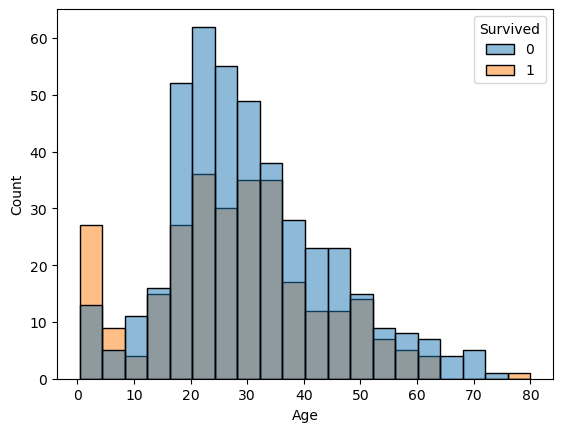

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Age', data=df, hue='Survived')

plt.show()

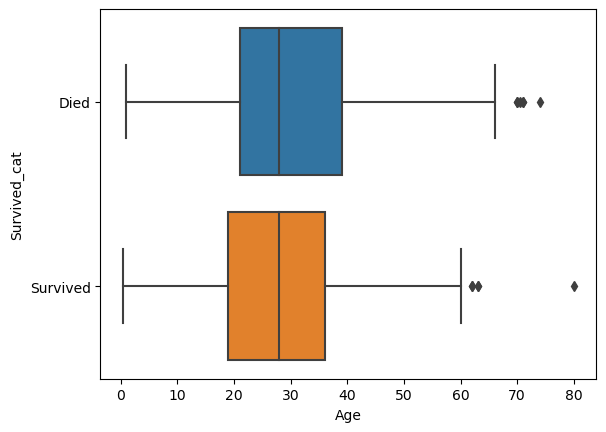

In [6]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

sns.boxplot(x='Age', data=df, y='Survived_cat')
plt.show()

In [5]:
df['Survived'].dtype

dtype('int64')

C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


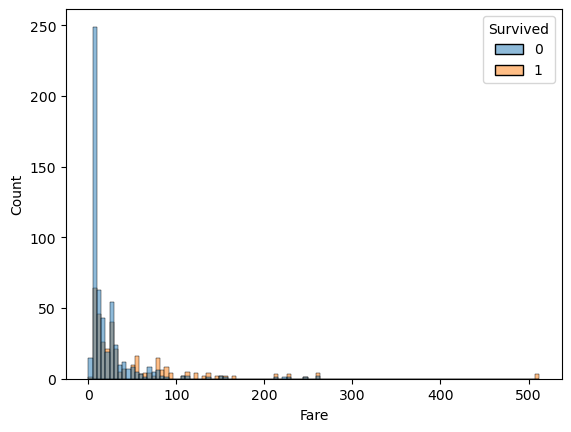

In [7]:
sns.histplot(x='Fare', data=df, hue='Survived')

plt.show()

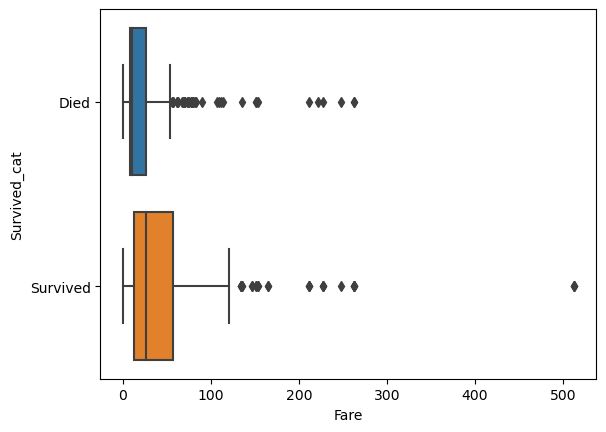

In [8]:
sns.boxplot(x='Fare', data=df, y='Survived_cat')

plt.show()

 - ### Age

In [72]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df.loc[df['Age'] < 40, 'Age40Cat'] = '< 40'
df.loc[df['Age'] >= 40, 'Age40Cat'] = '≥ 40'
pd.crosstab(df['Age40Cat'], df['Survived'])


Survived,0,1
Age40Cat,,
< 40,447,281
≥ 40,102,61


In [56]:
pd.crosstab(df['Age40Cat'], df['Survived'], normalize='index') * 100


Survived,0,1
Age40Cat,,
< 40,61.401099,38.598901
≥ 40,62.576687,37.423313


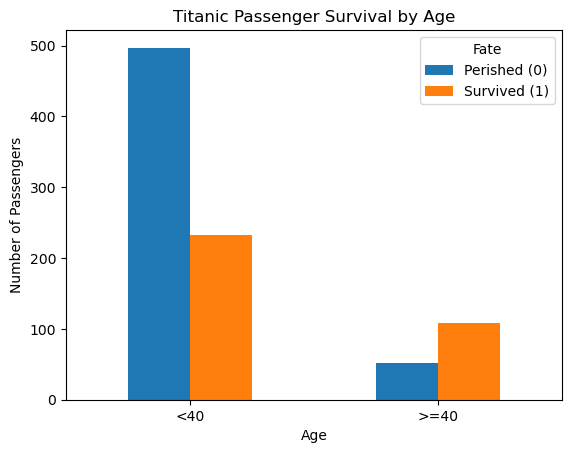

In [70]:
import matplotlib.pyplot as plt
cross_tab = pd.crosstab(df['Age40Cat'], df['Survived'])
cross_tab.plot(kind='bar')
plt.title('Titanic Passenger Survival by Age')
plt.ylabel('Number of Passengers')
plt.xlabel('Age')
plt.legend(['Perished (0)', 'Survived (1)'], title='Fate')
label_positions = [0,1]
custom_labels = ['<40', '>=40']
plt.xticks(label_positions, custom_labels, rotation=0)

plt.show()

We filled missing ages with the median and, using .loc, bucketed passengers into < 40 vs ≥ 40.
The crosstab shows 38.6% survival for < 40 and 37.4% for ≥ 40, so younger passengers did slightly better.

 - ## Passanger Class

In [63]:
count = df['Pclass'].value_counts().sort_index()

In [59]:
df['Pclass'].value_counts(normalize=True)*100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

In [107]:
pd.crosstab(df['Pclass'], df['Survived'] )


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


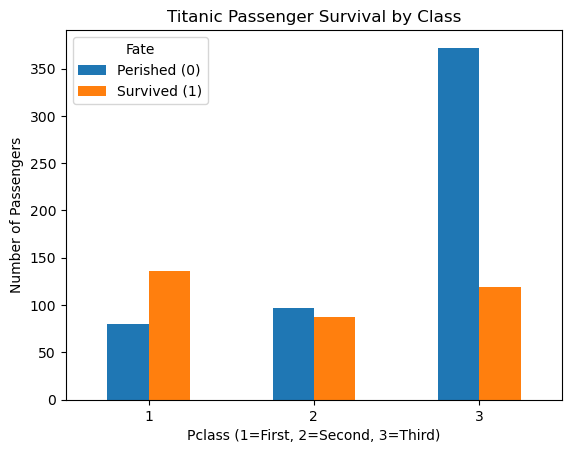

In [103]:
ax = ct.plot(kind='bar')
plt.title('Titanic Passenger Survival by Class')
plt.xlabel('Pclass (1=First, 2=Second, 3=Third)')
plt.ylabel('Number of Passengers')
plt.legend(['Perished (0)', 'Survived (1)'], title='Fate')
label_positions = [0,1,2]
custom_labels = ['1', '2', '3']
plt.xticks(label_positions, custom_labels, rotation=0)
plt.show()


We treated Pclass as an ordinal category (1=First, 2=Second, 3=Third) and compared survival by class.
From our crosstab: 1st ≈ 63% survived, 2nd ≈ 47%, 3rd ≈ 24%; note most passengers were 3rd class (~55%)

 - ## Sex

In [34]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [35]:
pd.crosstab(df['Sex'], df['Survived'], normalize=True)*100

Survived,0,1
Sex,,
female,9.090909,26.150393
male,52.525253,12.233446


In [108]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index')*100

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


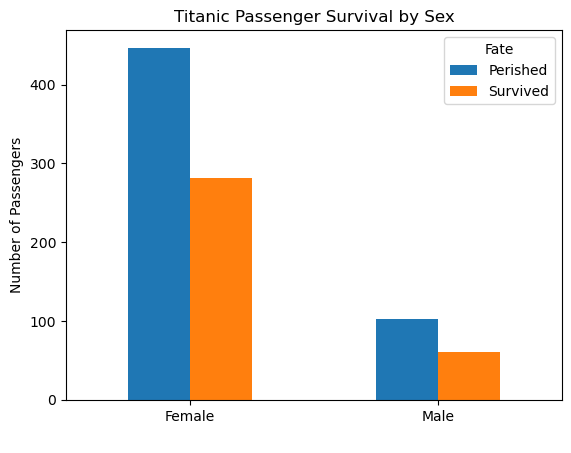

In [36]:
cross_tab.plot(kind='bar')

plt.title('Titanic Passenger Survival by Sex')
plt.ylabel('Number of Passengers')
plt.xlabel(' ')

plt.legend(['Perished', 'Survived'], title='Fate')

#Identify the positions on the x-axis that we want to label
label_positions = [0,1]
custom_labels = ['Female', 'Male']

plt.xticks(label_positions, custom_labels, rotation=0)

plt.show()

Women survived at a much higher rate: ~74% of females vs ~19% of males.
These percentages are calculated within each group.

 - ## Fare

In [73]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median()) 
df.loc[df['Fare'] < 50, 'Fare50Cat'] = '< 50'
df.loc[df['Fare'] >= 50, 'Fare50Cat'] = '≥ 50'
pd.crosstab(df['Fare50Cat'], df['Survived'])

Survived,0,1
Fare50Cat,,
< 50,497,233
≥ 50,52,109


In [75]:
pd.crosstab(df['Fare50Cat'], df['Survived'], normalize='index') * 100

Survived,0,1
Fare50Cat,,
< 50,68.082192,31.917808
≥ 50,32.298137,67.701863


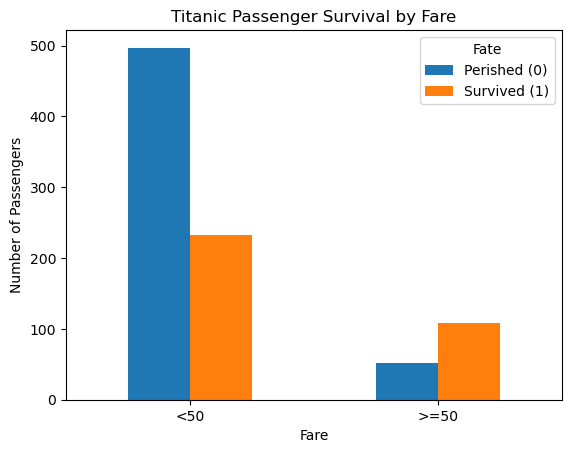

In [76]:
import matplotlib.pyplot as plt
cross_tab = pd.crosstab(df['Fare50Cat'], df['Survived'])
cross_tab.plot(kind='bar')
plt.title('Titanic Passenger Survival by Fare')
plt.ylabel('Number of Passengers')
plt.xlabel('Fare')
plt.legend(['Perished (0)', 'Survived (1)'], title='Fate')
label_positions = [0,1]
custom_labels = ['<50', '>=50']
plt.xticks(label_positions, custom_labels, rotation=0)

plt.show()

We filled missing fares with the median, using .loc, binned tickets into < 50 vs ≥ 50.
Row-percent crosstab shows survival ≈ 31.9% for < 50 vs 67.7% for ≥ 50.

- ## Travel companions (including both parents/children and siblings/spouse)

In [78]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [79]:
df['Parch'].value_counts(normalize=True)*100

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: proportion, dtype: float64

In [81]:

df.loc[df['Parch'] == 0, 'Parch_cat'] = 0
df.loc[ df['Parch'] > 0, 'Parch_cat'] = 1

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age40Cat,Fare50Cat,Parch_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,< 40,< 50,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,< 40,≥ 50,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,< 40,< 50,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,< 40,≥ 50,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,< 40,< 50,0.0


In [82]:

pd.crosstab(df['Parch'], df['Parch_cat'])

Parch_cat,0.0,1.0
Parch,,
0,678,0
1,0,118
2,0,80
3,0,5
4,0,4
5,0,5
6,0,1


In [83]:

pd.crosstab(df['Parch_cat'], df['Survived'])

Survived,0,1
Parch_cat,,
0.0,445,233
1.0,104,109


In [109]:
(pd.crosstab(df['Parch_cat'], df['Survived'], normalize='index') * 100)

Survived,0,1
Parch_cat,,
0.0,65.634218,34.365782
1.0,48.826291,51.173709


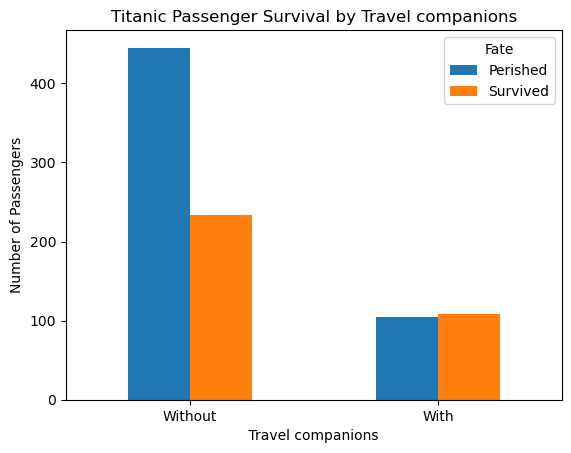

In [85]:
cross_tab= pd.crosstab(df['Parch_cat'], df['Survived'])
cross_tab.plot(kind='bar')

plt.title('Titanic Passenger Survival by Travel companions')
plt.ylabel('Number of Passengers')
plt.xlabel(' Travel companions ')

plt.legend(['Perished', 'Survived'], title='Fate')

#Identify the positions on the x-axis that we want to label
label_positions = [0,1]
custom_labels = ['Without', 'With']

plt.xticks(label_positions, custom_labels, rotation=0)

plt.show()

Travel companions (parents/children). Using .loc, we binned Parch into Parch_cat = 0 (no parents/children) vs 1 (with).
Survival was ~34.4% when without and ~51.2% when with.

 - ## Port of departure (indicated by the Embarked feature in the dataset)

In [88]:
pd.crosstab(df['Embarked'], df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [89]:
pd.crosstab(df['Embarked'], df['Survived'], normalize=True)*100

Survived,0,1
Embarked,,
C,8.436445,10.461192
Q,5.286839,3.374578
S,48.031496,24.409449


In [111]:
ct = pd.crosstab(df['Embarked'], df['Survived'])     # rows: C,Q,S ; cols: 0,1
survival_pct = (ct[1] / ct.sum(axis=1) * 100).round(1)
print(survival_pct.reindex(['C','Q','S']))

Embarked
C    55.4
Q    39.0
S    33.7
dtype: float64


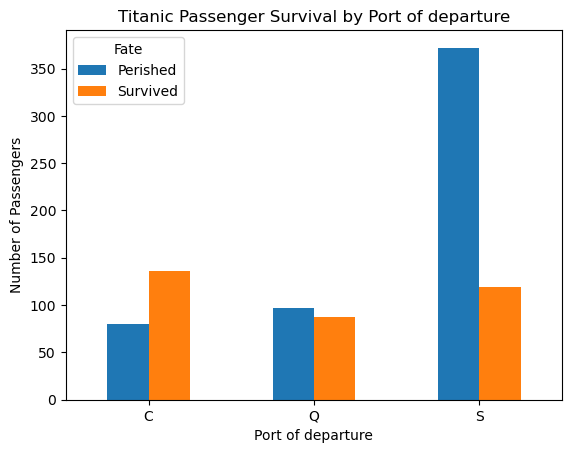

In [94]:
ax = ct.plot(kind='bar')
plt.title('Titanic Passenger Survival by Port of departure')
plt.xlabel('Port of departure')
plt.ylabel('Number of Passengers')
plt.legend(['Perished', 'Survived'], title='Fate')
label_positions = [0,1,2]
custom_labels = ['C', 'Q', 'S']
plt.xticks(label_positions, custom_labels, rotation=0)
plt.show()




Passengers boarding at Cherbourg (C) had the highest survival rate (~55%), compared with Queenstown (Q) (~39%) and Southampton (S) (~34%).

In [125]:
SurvivedCA = df.loc[(df['Survived']==1) & (df['Sex']=='female') & (df['Pclass']==1) & (df['Age']<40)  & (df['Fare']>=50) & (df['Parch']>0)  & (df['Embarked']=='C')]
SurvivedCA.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age40Cat,Fare50Cat,Parch_cat
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,< 40,≥ 50,1.0
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,< 40,≥ 50,1.0
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C,< 40,≥ 50,1.0
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,< 40,≥ 50,1.0
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,< 40,≥ 50,1.0


In [124]:
NotSurvivedCA = df.loc[(df['Survived']==0) & (df['Sex']=='male')   & (df['Pclass']==3) & (df['Age']>=40) & (df['Fare']<50)  & (df['Parch']==0) & (df['Embarked']=='S')]
NotSurvivedCA.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age40Cat,Fare50Cat,Parch_cat
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S,≥ 40,< 50,0.0
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S,≥ 40,< 50,0.0
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,≥ 40,< 50,0.0
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S,≥ 40,< 50,0.0
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,≥ 40,< 50,0.0


Interesting fact (for “most likely to survive” match):
Emily Borie Ryerson trip was a heartbreaking chain of events. While vacationing in Europe with her parents, sister Susan, brother John, and two servants (Grace Bowen, Victorine Chaudanson), the family learned her brother Arthur had died in a car crash on 8 April 1912. They hurried home on Titanic from Cherbourg—first class to meet another tragedy at sea.

Daniel Coxon (for “most likely not to survive” match):
Despite paralysis in one arm, “Popcorn Dan” was almost barred from boarding at Southampton; he produced his U.S. naturalization papers and was allowed on as a 3rd-class passenger (ticket 364500, £7 5s) — he perished and his body was never identified.
It capped a grim run of family tragedies, from his mother’s fatal fire to a brother’s violent death later that year.